# Exploratory Factor Analysis (EFA)

EFA is a reduction technique, such that the dimensions of the data set are reduced as the analysis makes groups out of columns in the data set.

Applications: matched-guise studies ([D'Onofrio, 2019](https://onlinelibrary.wiley.com/doi/abs/10.1111/josl.12368); [Weatherholtz et al., 2014](https://www.cambridge.org/core/journals/language-variation-and-change/article/sociallymediated-syntactic-alignment/08A99AE8BA59E60F5ACBB6FECB49DB48))

Exploratory Factor Analysis (EFA) is a statistical method used to describe latent factors by associating certain variables together. Latent factors are factors that are not directly measureable, such as solidarity and power, but that affect the outcome of measured variables. It is helpful to perform EFA on matched guise data, which often contains 10+ feature sets, in order to make the data more interpretable and to reduce the number of variables for future analysis (i.e. regression models). 

Import the following libraries:

In [1]:
import pandas as pd # allows you to open .csv files into Python

# libraries for plotting
import matplotlib.pyplot as plt # allows you to plot in Python
# allows for plotting inline
%matplotlib inline

from sklearn.preprocessing import StandardScaler # z-scores data set, where mean = 0, SD = 1

# factor analysis
import factor_analyzer as fa # factor analysis algorithm

If you need to install the `factor_analyzer` package, uncomment and run the following cell:

In [ ]:
#pip install factor_analyzer

### Exploratory Factor Analysis (EFA)

Exploratory factor analysis is a statistical technique used for dimensionality reduction (reduces the number of features in a data set) and for solving issues of colinearity among variables. The technique aims to find correlations of variance among variables to pinpoint the underlying structure of the data set, effectively identifying latent factors that cannot be measured directly, but that affect a set of variables. Importantly, these latent factors are *interpretable*, and can be labeled (contrary to components identified by principal component analysis). The image below illustrates this distinction.

![PCA vs EFA](https://kvoqx44227.i.lithium.com/t5/image/serverpage/image-id/5945i6C9C25C89DA06AA7/image-dimensions/697x303?v=1.0)

(Source: https://community.jmp.com/t5/JMP-Blog/Principal-components-or-factor-analysis/ba-p/38347)

The process of factor analysis begins with the generation of a correlation matrix across each variable in the data set. Then, factor loadings are calculated by various methods, to approximate the original correlation matrix using fewer variables. A very common method of calculating factor loadings is the method of least squares (or minimum residuals), which aims to minimize the sum of squares in the loadings matrix. Once the loadings matrix is generaed, the coordinates of factor dimensions are rotated to increase the interpretability of the factors.

<img src="figures/efa_process.png" width="500">

(Source: https://www.youtube.com/watch?v=Q2JBLuQDUvI)

#### Assumptions about the Data Set

In order to determine the sampling adequacy of the data set, Bartlett's Test and Kaiser-Meyer-Olkin Test should be run to determine the sphericity and proportion of variance, respectively, of the data. 

For Bartlett's Test, a p-value less than 0.05 rejects the null hypothesis that the correlation matrix is equal to the identity matrix (that the variables are unrelated).

For the KMO Test, the returned value indicates the proportion of variance in the variables that is predicted by the other variables. A high value (generally > 0.6) indicates that the data set is suitable for factor analysis.

Both of these statistical methods can be accessed via the `factor_analysis` package in Python.

#### Parameters of Factor Analysis

The three main parameters to manipulate in the EFA algorithm are the extraction method, the rotation method, and the number of factors to generate.

- `method`; the extraction method determines the statistical method that generates factors before rotation; the default method is `minres` which uses a minimum residual solution, other options include `ml`, maximal liklihood, and `principal`, principal components.
- `rotation`; rotation changes the coordinates of the factor dimensions, thereby increasing the interpretability of the factors (each variable is associated with a maximum of one factor). `varimax` is a commonly selected rotation method as it maintains an orthogonal relationship between factors (not correlated). Another option is `promax`, which allows factors to be correlated, and is the default setting.
- `n_factors`; the number of factors should not be pre-determined by the researcher, but should be selected based on the criteria outlined in the section below.

See <https://factor-analyzer.readthedocs.io/en/latest/index.html> for more details about the Python package.

#### Selecting the Number of Factors

To determine the number of factors to extract, there are a couple of generally accepted guidelines. First, each common factor should have an Eigenvalue of at least 1. The cut off for the number of factors can also be selected following the same "elbow method" as in *k*-means clustering, but the guideline for Eigenvalues should be followed first.

#### What to Report

In a paper, the information commonly reported with EFA is the method of extraction, the method of rotation, the loadings matrix, p-value obtained from the Bartlett's Test, the KMO Test value, whether the Eigenvalues of the factors were greater than 1, and the percent of cummulative variance explained by the selected factors.

#### Practice

The data set that will be used for this practice example contains perception ratings of a matched guise study with guises in both Italian and Genoese (Licata, [forthcoming](https://www.researchgate.net/publication/336994476_Language_Attitudes_in_Liguria_Effects_of_Gender_on_the_Perception_of_Genoese)). Participants were tasked with rating each guise on a Likert scale (7 point) according to different features:

- Untrustworthy -- Trustworthy
- Would NOT be my friend -- Would be my friend (coded as 'Friendly')
- Disagreeable -- Agreeable
- Has a low-paying job -- Has a high-paying job (coded as 'Wealthy')
- Not educated -- Educated
- Not born in Liguria -- Born in Liguria (coded as 'Local')
- From country -- From city (coded as 'Urban')
- Has a masculine voice -- Has a feminine voice (coded as 'Feminine_voice')
- Speaks language poorly -- Speaks language well (coded as 'Language_mastery')
- NOT pleasant to hear -- Pleasant to hear (coded as 'Pleasant_voice')
- Has an ugly accent -- Has a refined accent (coded as 'Refined_accent')

There are 65 participants, each rating 4 guises (across factors of guise language and guise gender), for a total of 260 rows of data.

In [2]:
guise = pd.read_csv("data/matched_guise.csv")
guise.head()

,GuiseLanguage,GuiseGender,Participant,ListenerGender,Trustworthy,Friendly,Agreeable,Wealthy,Educated,Local,Urban,Feminine_voice,Language_mastery,Pleasant_voice,Refined_accent
0,Genoese,Female,s1,Male,3,3,3,4,3,7,5,7,5,5,3
1,Genoese,Female,s2,Male,5,5,6,4,1,4,4,4,5,4,4
2,Genoese,Female,s3,Male,4,5,5,4,4,7,2,7,4,5,4
3,Genoese,Female,s4,Female,5,4,4,5,5,5,5,7,4,4,5
4,Genoese,Female,s5,Female,6,3,3,4,6,6,4,7,6,6,7


In [3]:
# drop the participant column and social factors from data set
values = guise[guise.columns[4:]] # takes columns from a range 'index 4' to the end
values.head()

,Trustworthy,Friendly,Agreeable,Wealthy,Educated,Local,Urban,Feminine_voice,Language_mastery,Pleasant_voice,Refined_accent
0,3,3,3,4,3,7,5,7,5,5,3
1,5,5,6,4,1,4,4,4,5,4,4
2,4,5,5,4,4,7,2,7,4,5,4
3,5,4,4,5,5,5,5,7,4,4,5
4,6,3,3,4,6,6,4,7,6,6,7


Now both the Bartlett's test and the KMO test should be run.

In [4]:
# Bartlett's Test, prints the chi square value and associated p-value
fa.calculate_bartlett_sphericity(values)

(729.0291323295164, 9.087814756596995e-119)

In [5]:
fa.calculate_kmo(values)[1] # index of 1 returns the overall KMO value

0.7798812540303643

Because the Bartlett's Test returned a significant p-value (<0.05) and the KMO Test returned a value greater than 0.6, this data set is suitable for factor analysis. Run the following line of code to standardize the data with a z-score transform.

In [6]:
# z-score the data set
values_std = StandardScaler().fit_transform(values)

Run the code below to obtain the Eigenvalues for 11 factors (as many factors as there are variables). Keep in mind that the factors selected for EFA must all have an Eigenvalue of at least 1.

In [7]:
# calculate loadings matrix with 11 factors
fact = fa.FactorAnalyzer(n_factors = 11, rotation = "varimax")
fact.fit(values_std)
ev = fact.get_eigenvalues()[0]
ev

array([3.33630887, 1.92854707, 1.22243771, 0.849645  , 0.76508625,
       0.59908654, 0.56991865, 0.50794784, 0.4398629 , 0.39852826,
       0.38263091])

Make another Scree plot (like with k-means clustering) and plot the Eigenvalue associated with each common factor.

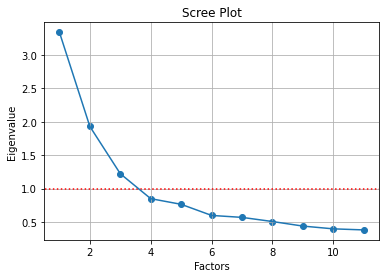

In [8]:
plt.scatter(range(1,12),ev) # range should equal the number of features in the data set, here there are 11
plt.plot(range(1,12),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.hlines(y = 1, xmin = 0, xmax = 12, colors = "red", linestyle = "dotted") # eigenvalue cut off of 1
plt.xlim(left = 0.5, right = 11.5)
plt.grid()
plt.show()

Based on the plot above, only three factors have an Eigenvalue of at least 1. Fit the data again, this time changing the number of factors to 3. In addition to fitting the data, the cell below will also extract the eigenvalues for each factor and generate the loadings matrix.

In [9]:
# fit data with 3 factors
fact = fa.FactorAnalyzer(n_factors = 3, rotation = "varimax")
fact.fit(values_std)

# calculate eigenvalues for each factor
ev = fact.get_eigenvalues()[0]
print("eigenvalues: ", ev)

# calculate cummulative variance
variance = fact.get_factor_variance()[1] # index 1 just gives the cummulative variance for each factor
print("explained variance: ",variance)

# calculate loadings matrix for each factor and feature
loadings = fact.loadings_
# create a dataframe and label the index with the columns from the original data set
loadings_matrix = pd.DataFrame(data = loadings, columns = ['F1', 'F2', 'F3'], index=values.columns[:])
loadings_matrix

eigenvalues:  [3.33630887 1.92854707 1.22243771 0.849645   0.76508625 0.59908654
 0.56991865 0.50794784 0.4398629  0.39852826 0.38263091]
explained variance:  [0.18491363 0.14483362 0.11374179]


,F1,F2,F3
Trustworthy,0.606707,0.368039,-0.095908
Friendly,0.750880,0.078162,0.093147
Agreeable,0.755232,0.118416,-0.058392
Wealthy,0.077239,0.420910,0.261221
Educated,0.221101,0.491307,0.132247
Local,0.028913,0.001402,-0.678808
Urban,-0.012932,0.326347,0.524129
Feminine_voice,-0.020038,0.001072,0.553927
Language_mastery,0.161499,0.693886,-0.255318
Pleasant_voice,0.614002,0.355578,-0.075505


In order to determine which features are reported as associated with which factors, the following rule of thumb is used:

- A loading value of |>0.4| indicates that a variable 'belongs' to the factor and is reported.
- A loading value of |<0.1| indicates that a variable does not 'belong' to the factor and may be omitted from the report.

Accordingly, `Factor 1` is associated with: **Trustworthy, Friendly, Agreeable, Pleasant voice**; `Factor 2` is associated with: **Wealthy, Educated, Mastery of language, Refined accent**; `Factor 3` is associated with: **(-)Local, Urban, Feminine**.

Using domain knowledge and prior literature, the factors can then be labeled (perhaps as Solidarity, Power, and Metropolitanism) and analyzed/submitted to regression models. Below is an example of how a table of factor loadings might be compiled in a paper:

<img src="figures/efa_table.png" width="400">

In order to transform the entire data set according to these three factors, the following code should be run:

In [10]:
transformed_data = fact.transform(values_std)
new_data = pd.DataFrame(data = transformed_data, columns = ['Solidarity', 'Power', 'Metropolitanism'])
new_data.head()

,Solidarity,Power,Metropolitanism
0,-1.104709,-0.522754,-0.149930
1,0.248581,-0.989599,0.044476
2,0.105088,-1.076647,-0.268147
3,-0.455948,-0.312721,0.605642
4,-0.666034,0.717471,-0.077341


In [11]:
guise_new = guise.join(new_data)
guise_new.head()

,GuiseLanguage,GuiseGender,Participant,ListenerGender,Trustworthy,Friendly,Agreeable,Wealthy,Educated,Local,Urban,Feminine_voice,Language_mastery,Pleasant_voice,Refined_accent,Solidarity,Power,Metropolitanism
0,Genoese,Female,s1,Male,3,3,3,4,3,7,5,7,5,5,3,-1.104709,-0.522754,-0.149930
1,Genoese,Female,s2,Male,5,5,6,4,1,4,4,4,5,4,4,0.248581,-0.989599,0.044476
2,Genoese,Female,s3,Male,4,5,5,4,4,7,2,7,4,5,4,0.105088,-1.076647,-0.268147
3,Genoese,Female,s4,Female,5,4,4,5,5,5,5,7,4,4,5,-0.455948,-0.312721,0.605642
4,Genoese,Female,s5,Female,6,3,3,4,6,6,4,7,6,6,7,-0.666034,0.717471,-0.077341


For more examples of linguistic applications of exploratory factor analysis, see [D'Onofrio (2019)](https://onlinelibrary.wiley.com/doi/abs/10.1111/josl.12368) and [Weatherholtz et al. (2014)](https://www.cambridge.org/core/journals/language-variation-and-change/article/sociallymediated-syntactic-alignment/08A99AE8BA59E60F5ACBB6FECB49DB48).

---
### References
Castro-Schilo, L. (2017). Principal components or factor analysis? https://community.jmp.com/t5/JMP-Blog/Principal-components-or-factor-analysis/ba-p/38347.

D'Onofrio, A. (2019). Complicating categories: Personae mediate racialized expectations of non‐native speech. *Journal of Sociolinguistics*, 23(4), 346-366.

Gaskin, J. (2014). Exploratory Factor Analysis (conceptual). https://www.youtube.com/watch?v=Q2JBLuQDUvI.

Licata, Gabriella. (forthcoming). Language Attitudes in Liguria: Effects of Gender on the Perception of Genoese. *Proceedings from 49th Linguistic Symposium on Romance Languages*. University of Georgia.

Weatherholtz, K., Campbell-Kibler, K., & Jaeger, T. F. (2014). Socially-mediated syntactic alignment. *Language Variation and Change*, 26(3), 387.